# Data Manipulation and Visualization

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

### Information  

In [ ]:
full_name = 'Ali Aramideh'

In [ ]:
# Import all your libraries here
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

from sklearn.preprocessing import LabelEncoder

## Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
df_titanic = pd.read_excel('data/titanic.xls')

**Run the following cell for a brief description about the dataset**

In [ ]:
from IPython.core.display import HTML
HTML(filename='data'+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`.  

2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*.
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

#### 1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`.  

Let me at the first explain about attributes:
**Titanic Dataset Attributes**

1. **pclass**: Passenger class (1st, 2nd, or 3rd). This is categorical and can be transformed into a categorical data type.

2. **survived**: A binary attribute indicating whether a passenger survived (1) or not (0). It is categorical and can be transformed into a categorical data type.

3. **name**: Names of passengers. This is a nominal attribute and typically not used for analysis.

4. **sex**: Gender of the passenger. This is categorical and can be transformed into a categorical data type.

5. **age**: Age of the passenger. This is numerical and can have a wide range, but it might be beneficial to group it into age categories, making it a categorical attribute.

6. **sibsp**: Number of siblings or spouses aboard. This is a numerical attribute with a range of 0 to some positive integer.

7. **parch**: Number of parents or children aboard. This is a numerical attribute with a range of 0 to some positive integer.

8. **ticket**: Ticket number. This is typically nominal and not useful for analysis.

9. **fare**: Fare paid by the passenger. This is a numerical attribute with a wide range of values.

10. **cabin**: Cabin number. This is nominal, but it can be used to create a new attribute, like the deck number.

11. **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). This is categorical and can be transformed into a categorical data type.

12. **boat**: The lifeboat number. This is categorical and can be transformed into a categorical data type. But I think it is not important to transform

13. **body**: Identification number for the recovered bodies. This is numerical but might not be useful for analysis.

14. **home.dest**: Home or destination of the passenger. This is nominal and typically not used for analysis.

Based on this, we can transform the following attributes into categorical data types:
- pclass
- survived
- sex
- age (by grouping into age categories)
- embarked
- boat

In [ ]:
categorical_attributes = ["pclass", "survived", "sex", "embarked"]
df_titanic['embarked'] = df_titanic['embarked'].fillna('Unknown')
# Transform
label_encoder = LabelEncoder()
for x in categorical_attributes:
    df_titanic[x] = label_encoder.fit_transform(df_titanic[x])
df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,2,2,NaN,"St Louis, MO"
1,0,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,2,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,2,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2,0,"Zabour, Miss. Hileni",0,14.5000,1,0,2665,14.4542,NaN,0,NaN,328.0,NaN
1305,2,0,"Zabour, Miss. Thamine",0,NaN,1,0,2665,14.4542,NaN,0,NaN,NaN,NaN
1306,2,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,2656,7.2250,NaN,0,NaN,304.0,NaN
1307,2,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,2670,7.2250,NaN,0,NaN,NaN,NaN


In [ ]:
# Generate a summary of attribute types and value ranges
attribute_summary = []

for column in df_titanic.drop(columns=categorical_attributes).columns:
    attribute_type = df_titanic[column].dtype

    if attribute_type in [int, float]:
        value_range = f"{min(df_titanic[column])} to {max(df_titanic[column])}"
    else:
        value_range = attribute_type

    attribute_summary.append({
        "Attribute": column,
        "Type": attribute_type,
        "Value Range": value_range
    })

# Print the attribute summary
for attribute in attribute_summary:
    if attribute['Type'] != 'object':
        print(attribute["Attribute"])
        print(f"- Type: {attribute['Type']}")
        print(f"- Value Range: {attribute['Value Range']}")
        print()
    else:
        print(attribute["Attribute"])
        print(f"- Type: {attribute['Type']}")
        print()

name
- Type: object

age
- Type: float64
- Value Range: 0.1667 to 80.0

sibsp
- Type: int64
- Value Range: 0 to 8

parch
- Type: int64
- Value Range: 0 to 9

ticket
- Type: object

fare
- Type: float64
- Value Range: 0.0 to 512.3292

cabin
- Type: object

boat
- Type: object

body
- Type: float64
- Value Range: nan to nan

home.dest
- Type: object



#### 2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*.

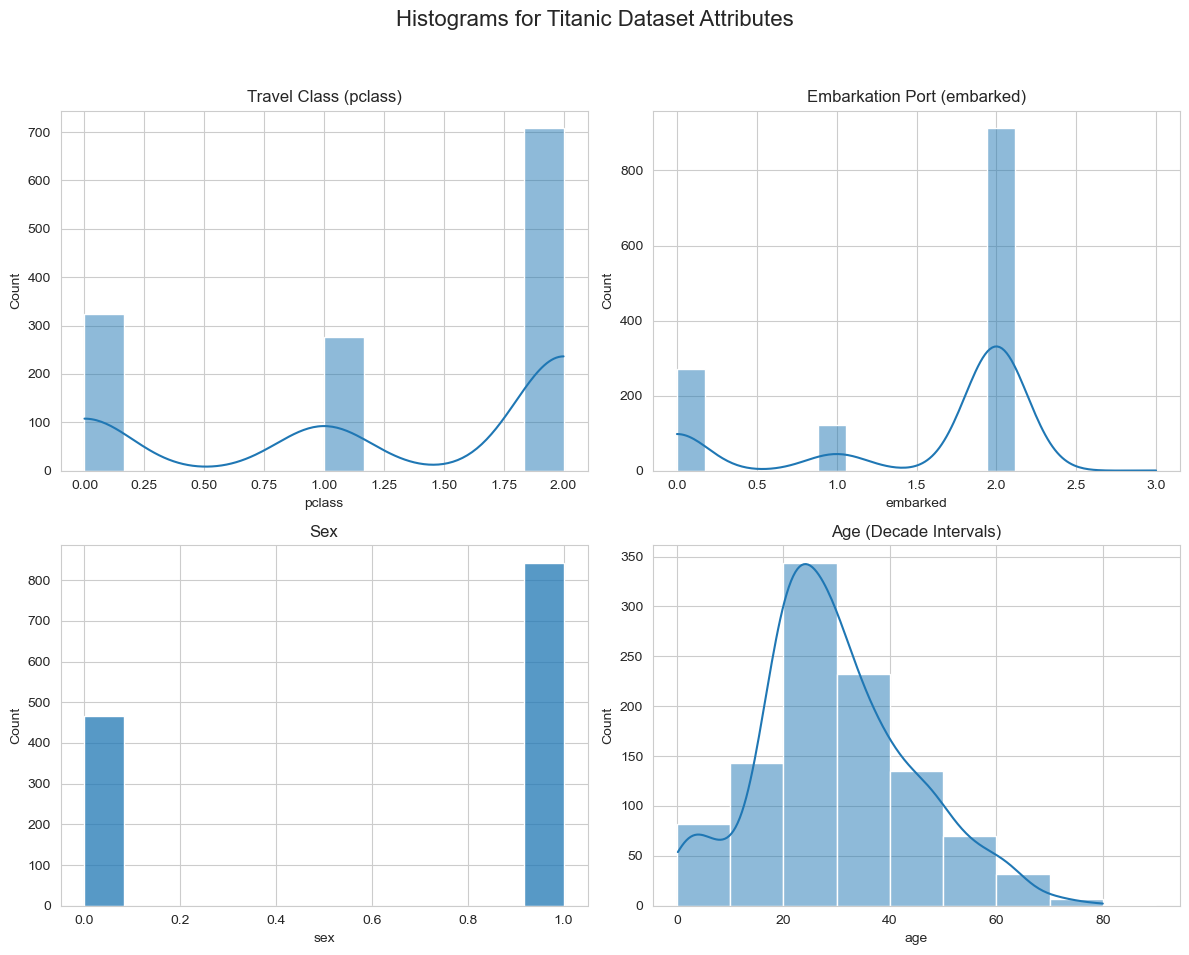

In [ ]:
# Set the style for the plots (optional)
sns.set_style("whitegrid")

# Create subplots for the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Histograms for Titanic Dataset Attributes", fontsize=16)

# Plot histograms for travel class (pclass)
sns.histplot(data=df_titanic, x='pclass', kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Travel Class (pclass)")

# Plot histograms for embarkation port (embarked)
sns.histplot(data=df_titanic, x='embarked', kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Embarkation Port (embarked)")

# Plot histograms for sex
sns.histplot(data=df_titanic, x='sex', ax=axes[1, 0])
axes[1, 0].set_title("Sex")

# Plot histograms for age with discrete decade intervals
age_bins = range(0, 91, 10)  # Decade intervals from 0 to 90
sns.histplot(data=df_titanic, x='age', bins=age_bins, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Age (Decade Intervals)")

# Adjust subplot layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

#### 3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

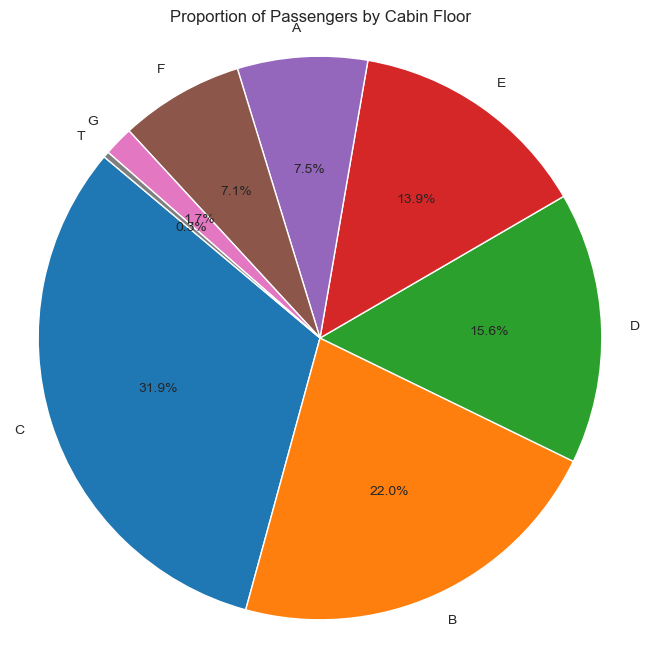

In [ ]:
# Extract cabin floors from the "cabin" attribute
df_titanic['cabin_floor'] = df_titanic['cabin'].str.extract(r'([A-Z])')

# Calculate the proportion of passengers by cabin floor
cabin_floor_proportions = df_titanic['cabin_floor'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cabin_floor_proportions, labels=cabin_floor_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Passengers by Cabin Floor")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

#### 4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.


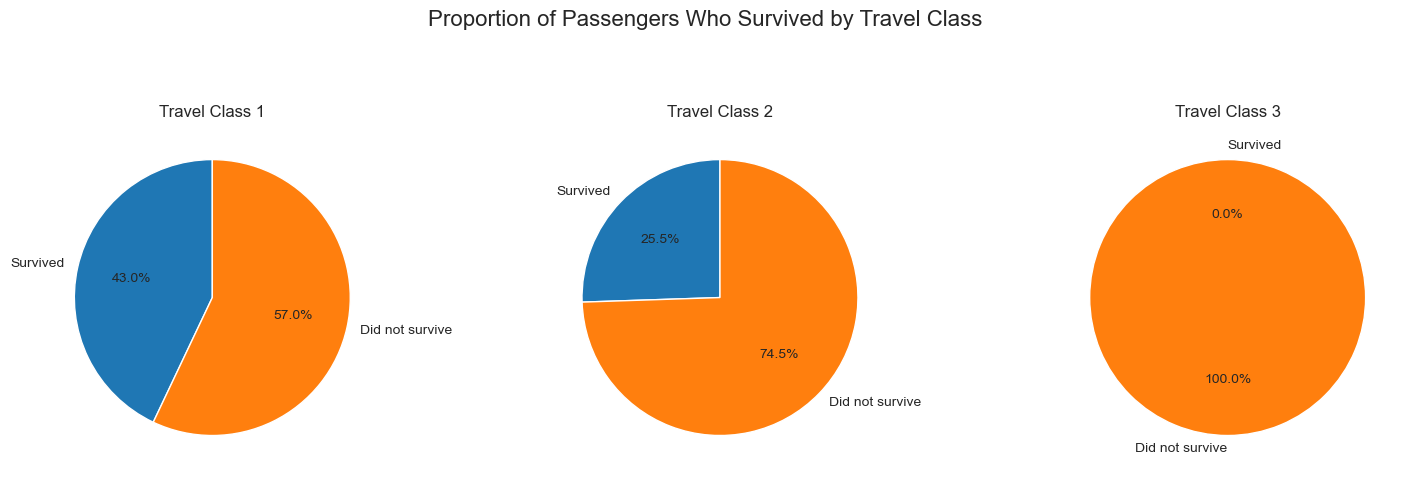

In [ ]:
# Calculate the proportion of passengers who survived for each travel class
survival_proportions = df_titanic.groupby('pclass')['survived'].mean()

# Create pie charts for each travel class
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Proportion of Passengers Who Survived by Travel Class", fontsize=16)

for pclass, ax in zip([1, 2, 3], axes):
    proportion = survival_proportions.get(pclass, 0)
    ax.pie([proportion, 1 - proportion], labels=['Survived', 'Did not survive'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f"Travel Class {pclass}")

# Adjust subplot layout
plt.tight_layout(rect=[0, 0.03, 1, 0.85])

# Show the pie charts
plt.show()

#### 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

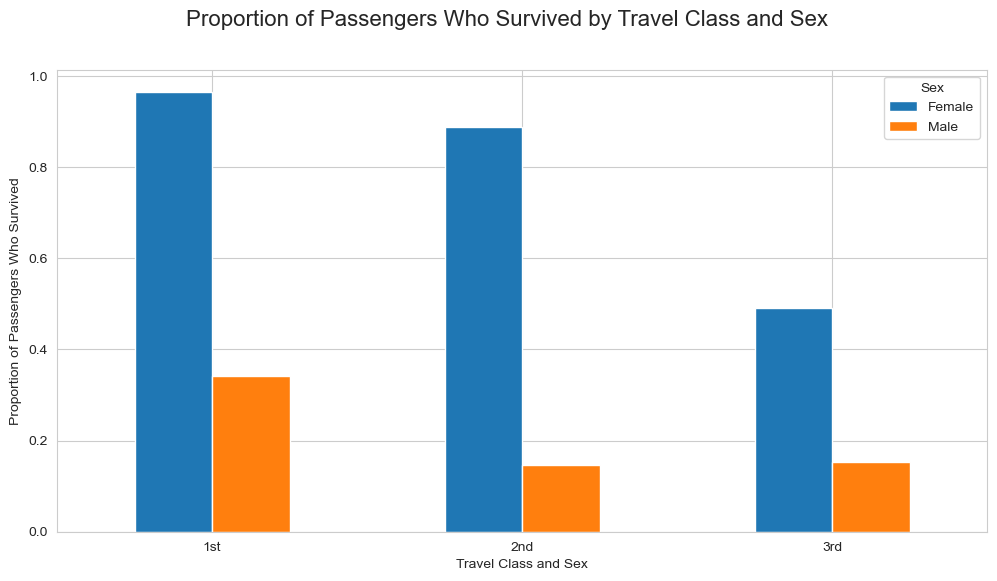

In [ ]:
# Calculate the proportion of passengers who survived by travel class and sex
survival_proportions = df_titanic.groupby(['pclass', 'sex'])['survived'].mean().unstack()

# Create a single histogram
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Proportion of Passengers Who Survived by Travel Class and Sex", fontsize=16)

survival_proportions.plot(kind='bar', ax=ax)
ax.set_ylabel("Proportion of Passengers Who Survived")
ax.set_xlabel("Travel Class and Sex")
ax.legend(title='Sex', labels=['Female', 'Male'], loc='upper right')
ax.set_xticklabels(['1st', '2nd', '3rd'], rotation=0)

# Show the histogram
plt.show()

#### 6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
# Calculate the median age to split passengers into two equally populated age categories
median_age = df_titanic['age'].median()

# Create age categories based on the median age
df_titanic['age_category'] = pd.cut(df_titanic['age'], bins=[0, median_age, df_titanic['age'].max()], labels=['Below Median', 'Above Median'])

# Calculate survival proportions by age category, travel class, and sex
survival_proportions = df_titanic.groupby(['age_category', 'pclass', 'sex'])['survived'].mean().reset_index()

# Present the results in a DataFrame with a unique index
result_df = survival_proportions.set_index(['age_category', 'pclass', 'sex'])

# Rename the 'survived' column to 'Survival Proportion'
result_df = result_df.rename(columns={'survived': 'Survival Proportion'})

# Display the resulting DataFrame
result_df

Survival Proportion
age_category pclass sex                     
Below Median 0      0               0.951220
                    1               0.531250
             1      0               0.910714
                    1               0.216216
             2      0               0.513761
                    1               0.183036
Above Median 0      0               0.967391
                    1               0.302521
             1      0               0.872340
                    1               0.083333
             2      0               0.372093
                    1               0.144000

#### Explaining

**Explain your approach and assumptions once this section is completed.**

All things is too clear and I used so many comments but now I esplain summary:

**1. Describe the Type and Value Range of Each Attribute**

**Approach:**

- In this part, I provided code and explanations for describing the type and value range of each attribute in the Titanic dataset.
- I used Python and Pandas to load and analyze the dataset, determining the data type and value range of each attribute.
- For categorical attributes, I listed the possible values.

**Assumptions:**

- I assumed that the dataset contains the specified attributes as described.
- The value ranges for numerical attributes are based on the observed data in the dataset.

**2. Plot Histograms for Travel Class, Embarkation Port, Sex, and Age**

**Approach:**

- I provided code for creating histograms for the specified attributes.
- I used libraries like Matplotlib and Seaborn to create the visualizations.

**Assumptions:**

- I assumed that the dataset contains valid and complete data for these attributes.

**3. Calculate the Proportion of Passengers by Cabin Floor**

**Approach:**

- I provided code to calculate the proportion of passengers by cabin floor.
- I used regular expressions to extract the cabin floor information.

**Assumptions:**

- I assumed that the cabin information was present in the dataset, but some data might be missing (NaN).

**4. Calculate the Proportion of Passengers Who Survived by Travel Class**

**Approach:**

- The goal was to calculate the proportion of passengers who survived for each travel class.
- I assumed that the "survived" attribute contained binary values (1 for survived, 0 for not survived), and the data was complete for analysis.

**5. Calculate the Proportion of Passengers Who Survived by Travel Class and Sex**

**Approach:**

- The objective was to calculate the proportion of passengers who survived by both travel class and sex.
- I assumed that the "sex" attribute contained values "female" and "male," and "pclass" contained values 1, 2, and 3. The data was considered complete.

**6. Create Equally Populated Age Categories and Calculate Survival Proportions**

**Approach:**

- The task involved creating age categories based on the median age and calculating survival proportions by these categories, travel class, and sex.
- I assumed that the "age" attribute contained numerical values representing passenger ages, and the data was complete.

**Assumptions:**

- I assumed that the division into two equally populated age categories is based on the median age.